In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('data/mbti_1.csv')
df

,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You're fired.|||That's another silly misconce...
...,...,...
8670,ISFP,'https://www.youtube.com/watch?v=t8edHB_h908||...
8671,ENFP,'So...if this thread already exists someplace ...
8672,INTP,'So many questions when i do these things. I ...
8673,INFP,'I am very conflicted right now when it comes ...


In [3]:
import re
import string
def clear_text(text):
    #removing links from text data
    links_removed=re.sub('https?://[^\s<>"]+|www\.[^\s<>"]+',' ',text)
    #removing other symbols
    cleaned_text =re.sub('[^0-9a-z]',' ',links_removed)
    return cleaned_text
df["cleaned_text"] = df["posts"].apply(lambda x: clear_text(x.lower()))
df.head()

,type,posts,cleaned_text
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,and intj moments sportscenter not top t...
1,ENTP,'I'm finding the lack of me in these posts ver...,i m finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...,good one course to which i say i ...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o...",dear intp i enjoyed our conversation the o...
4,ENTJ,'You're fired.|||That's another silly misconce...,you re fired that s another silly misconce...


In [4]:
#Tokenize: break texts into sentences or words  
def tokenzie(text):
    tokens = re.split('\W+', text)
    return tokens

df["text_tokenized"] = df["cleaned_text"].apply(lambda x:tokenzie(x))
df.head()

,type,posts,cleaned_text,text_tokenized
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,and intj moments sportscenter not top t...,"[, and, intj, moments, sportscenter, not, top,..."
1,ENTP,'I'm finding the lack of me in these posts ver...,i m finding the lack of me in these posts ver...,"[, i, m, finding, the, lack, of, me, in, these..."
2,INTP,'Good one _____ https://www.youtube.com/wat...,good one course to which i say i ...,"[, good, one, course, to, which, i, say, i, kn..."
3,INTJ,"'Dear INTP, I enjoyed our conversation the o...",dear intp i enjoyed our conversation the o...,"[, dear, intp, i, enjoyed, our, conversation, ..."
4,ENTJ,'You're fired.|||That's another silly misconce...,you re fired that s another silly misconce...,"[, you, re, fired, that, s, another, silly, mi..."


In [5]:
#nltk.download()

In [5]:
import nltk
from nltk.corpus import stopwords
stopword = stopwords.words('english')

In [6]:
# Removing stopwords 
def remove_stopwords(text_list):
    text = [word for word in text_list if word not in stopword]
    return text
df["text_nostop"] = df["text_tokenized"].apply(lambda x: remove_stopwords(x))
df.head()

,type,posts,cleaned_text,text_tokenized,text_nostop
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,and intj moments sportscenter not top t...,"[, and, intj, moments, sportscenter, not, top,...","[, intj, moments, sportscenter, top, ten, play..."
1,ENTP,'I'm finding the lack of me in these posts ver...,i m finding the lack of me in these posts ver...,"[, i, m, finding, the, lack, of, me, in, these...","[, finding, lack, posts, alarming, sex, boring..."
2,INTP,'Good one _____ https://www.youtube.com/wat...,good one course to which i say i ...,"[, good, one, course, to, which, i, say, i, kn...","[, good, one, course, say, know, blessing, cur..."
3,INTJ,"'Dear INTP, I enjoyed our conversation the o...",dear intp i enjoyed our conversation the o...,"[, dear, intp, i, enjoyed, our, conversation, ...","[, dear, intp, enjoyed, conversation, day, eso..."
4,ENTJ,'You're fired.|||That's another silly misconce...,you re fired that s another silly misconce...,"[, you, re, fired, that, s, another, silly, mi...","[, fired, another, silly, misconception, appro..."


In [7]:
#Steming - reduce a word to its stem forms 
wn = nltk.WordNetLemmatizer()
def lematizing (text_list):
    text = [wn.lemmatize(word) for word in text_list]
    return text
df["text_lemmatized"] = df["text_nostop"].apply(lambda x: lematizing(x))
df.head()

,type,posts,cleaned_text,text_tokenized,text_nostop,text_lemmatized
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,and intj moments sportscenter not top t...,"[, and, intj, moments, sportscenter, not, top,...","[, intj, moments, sportscenter, top, ten, play...","[, intj, moment, sportscenter, top, ten, play,..."
1,ENTP,'I'm finding the lack of me in these posts ver...,i m finding the lack of me in these posts ver...,"[, i, m, finding, the, lack, of, me, in, these...","[, finding, lack, posts, alarming, sex, boring...","[, finding, lack, post, alarming, sex, boring,..."
2,INTP,'Good one _____ https://www.youtube.com/wat...,good one course to which i say i ...,"[, good, one, course, to, which, i, say, i, kn...","[, good, one, course, say, know, blessing, cur...","[, good, one, course, say, know, blessing, cur..."
3,INTJ,"'Dear INTP, I enjoyed our conversation the o...",dear intp i enjoyed our conversation the o...,"[, dear, intp, i, enjoyed, our, conversation, ...","[, dear, intp, enjoyed, conversation, day, eso...","[, dear, intp, enjoyed, conversation, day, eso..."
4,ENTJ,'You're fired.|||That's another silly misconce...,you re fired that s another silly misconce...,"[, you, re, fired, that, s, another, silly, mi...","[, fired, another, silly, misconception, appro...","[, fired, another, silly, misconception, appro..."


In [8]:
df['text_lemmatized'][0]

['',
 'intj',
 'moment',
 'sportscenter',
 'top',
 'ten',
 'play',
 'prank',
 'life',
 'changing',
 'experience',
 'life',
 'repeat',
 'today',
 'may',
 'perc',
 'experience',
 'immerse',
 'last',
 'thing',
 'infj',
 'friend',
 'posted',
 'facebook',
 'committing',
 'suicide',
 'next',
 'day',
 'rest',
 'peace',
 'enfj7',
 'sorry',
 'hear',
 'distress',
 'natural',
 'relationship',
 'perfection',
 'time',
 'every',
 'moment',
 'existence',
 'try',
 'figure',
 'hard',
 'time',
 'time',
 'growth',
 '84389',
 '84390',
 'welcome',
 'stuff',
 'game',
 'set',
 'match',
 'prozac',
 'wellbrutin',
 'least',
 'thirty',
 'minute',
 'moving',
 'leg',
 'mean',
 'moving',
 'sitting',
 'desk',
 'chair',
 'weed',
 'moderation',
 'maybe',
 'try',
 'edible',
 'healthier',
 'alternative',
 'basically',
 'come',
 'three',
 'item',
 'determined',
 'type',
 'whichever',
 'type',
 'want',
 'would',
 'likely',
 'use',
 'given',
 'type',
 'cognitive',
 'function',
 'whatnot',
 'left',
 'thing',
 'moderation',


In [9]:
ps = nltk.PorterStemmer()

In [10]:
def clean_text(text): 
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.split('\\W+', text)
    text = [ps.stem(word) for word in tokens if word not in stopword]
    return text

In [11]:
#Using Count_Vector 
from sklearn.feature_extraction.text import CountVectorizer

count_vector = CountVectorizer(analyzer= clean_text)
X_counts = count_vector.fit_transform(df['posts'])
print(X_counts.shape)

(8675, 312793)


In [12]:
#Ngrams 
#ngram_vect = CountVectorizer(ngram_range=(2,2), analyzer= clear_text)
#X_counts = ngram_vect.fit_transform(df['posts'])
#print(X_counts.shape)
#print(ngram_vect.get_feature_names())

In [13]:
# using TF_IDF
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vect = TfidfVectorizer(analyzer=clean_text)
X_tfidf = tfidf_vect.fit_transform(df['posts'])
print(X_tfidf.shape)


(8675, 312793)


In [14]:
#Feature Creation 
#Create feature for the post length and % of punctuation or links in the posts. 
#Fucntion to calculate length of message excluding space
df["text_length"] = df["posts"].apply(lambda x: len(x)-x.count(" "))
df.head()

,type,posts,cleaned_text,text_tokenized,text_nostop,text_lemmatized,text_length
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,and intj moments sportscenter not top t...,"[, and, intj, moments, sportscenter, not, top,...","[, intj, moments, sportscenter, top, ten, play...","[, intj, moment, sportscenter, top, ten, play,...",4075
1,ENTP,'I'm finding the lack of me in these posts ver...,i m finding the lack of me in these posts ver...,"[, i, m, finding, the, lack, of, me, in, these...","[, finding, lack, posts, alarming, sex, boring...","[, finding, lack, post, alarming, sex, boring,...",5860
2,INTP,'Good one _____ https://www.youtube.com/wat...,good one course to which i say i ...,"[, good, one, course, to, which, i, say, i, kn...","[, good, one, course, say, know, blessing, cur...","[, good, one, course, say, know, blessing, cur...",4397
3,INTJ,"'Dear INTP, I enjoyed our conversation the o...",dear intp i enjoyed our conversation the o...,"[, dear, intp, i, enjoyed, our, conversation, ...","[, dear, intp, enjoyed, conversation, day, eso...","[, dear, intp, enjoyed, conversation, day, eso...",5171
4,ENTJ,'You're fired.|||That's another silly misconce...,you re fired that s another silly misconce...,"[, you, re, fired, that, s, another, silly, mi...","[, fired, another, silly, misconception, appro...","[, fired, another, silly, misconception, appro...",5125


/Users/maidang/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/maidang/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 66.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/maidang/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 40.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/maidang/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 62.3% of the points cannot be placed; you may want to decrease the size of the marker

<AxesSubplot:xlabel='type', ylabel='text_length'>

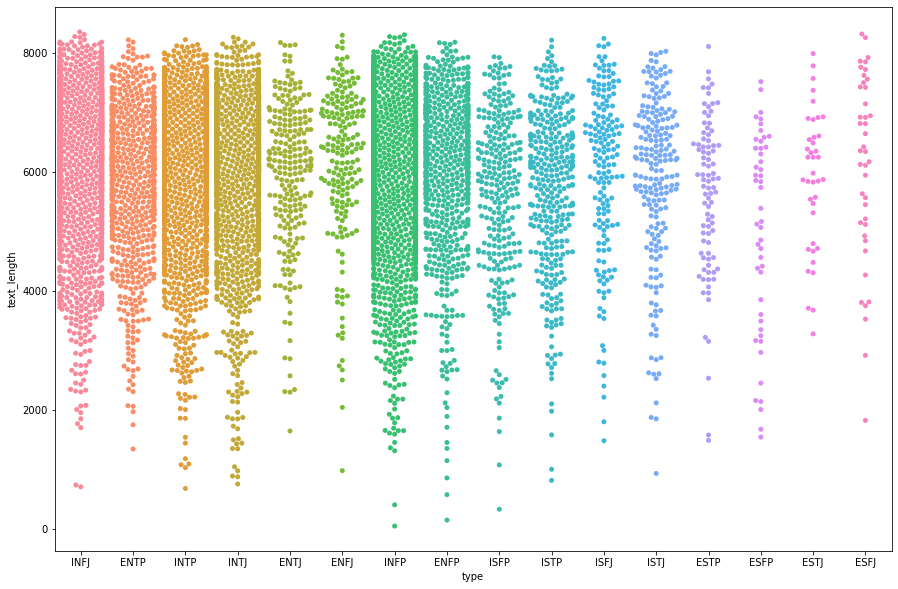

In [15]:
import seaborn as sn 
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
sn.swarmplot("type", "text_length", data=df)

In [16]:
def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text) - text.count(" ")), 3)*100

df["punct%"] = df["posts"].apply(lambda x: count_punct(x))
df.head()

,type,posts,cleaned_text,text_tokenized,text_nostop,text_lemmatized,text_length,punct%
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,and intj moments sportscenter not top t...,"[, and, intj, moments, sportscenter, not, top,...","[, intj, moments, sportscenter, top, ten, play...","[, intj, moment, sportscenter, top, ten, play,...",4075,12.7
1,ENTP,'I'm finding the lack of me in these posts ver...,i m finding the lack of me in these posts ver...,"[, i, m, finding, the, lack, of, me, in, these...","[, finding, lack, posts, alarming, sex, boring...","[, finding, lack, post, alarming, sex, boring,...",5860,9.0
2,INTP,'Good one _____ https://www.youtube.com/wat...,good one course to which i say i ...,"[, good, one, course, to, which, i, say, i, kn...","[, good, one, course, say, know, blessing, cur...","[, good, one, course, say, know, blessing, cur...",4397,9.5
3,INTJ,"'Dear INTP, I enjoyed our conversation the o...",dear intp i enjoyed our conversation the o...,"[, dear, intp, i, enjoyed, our, conversation, ...","[, dear, intp, enjoyed, conversation, day, eso...","[, dear, intp, enjoyed, conversation, day, eso...",5171,8.9
4,ENTJ,'You're fired.|||That's another silly misconce...,you re fired that s another silly misconce...,"[, you, re, fired, that, s, another, silly, mi...","[, fired, another, silly, misconception, appro...","[, fired, another, silly, misconception, appro...",5125,8.6


In [17]:
df["links%"] = df["posts"].apply(lambda x: x.count('http')/50*100)
df.head()

,type,posts,cleaned_text,text_tokenized,text_nostop,text_lemmatized,text_length,punct%,links%
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,and intj moments sportscenter not top t...,"[, and, intj, moments, sportscenter, not, top,...","[, intj, moments, sportscenter, top, ten, play...","[, intj, moment, sportscenter, top, ten, play,...",4075,12.7,48.0
1,ENTP,'I'm finding the lack of me in these posts ver...,i m finding the lack of me in these posts ver...,"[, i, m, finding, the, lack, of, me, in, these...","[, finding, lack, posts, alarming, sex, boring...","[, finding, lack, post, alarming, sex, boring,...",5860,9.0,20.0
2,INTP,'Good one _____ https://www.youtube.com/wat...,good one course to which i say i ...,"[, good, one, course, to, which, i, say, i, kn...","[, good, one, course, say, know, blessing, cur...","[, good, one, course, say, know, blessing, cur...",4397,9.5,10.0
3,INTJ,"'Dear INTP, I enjoyed our conversation the o...",dear intp i enjoyed our conversation the o...,"[, dear, intp, i, enjoyed, our, conversation, ...","[, dear, intp, enjoyed, conversation, day, eso...","[, dear, intp, enjoyed, conversation, day, eso...",5171,8.9,4.0
4,ENTJ,'You're fired.|||That's another silly misconce...,you re fired that s another silly misconce...,"[, you, re, fired, that, s, another, silly, mi...","[, fired, another, silly, misconception, appro...","[, fired, another, silly, misconception, appro...",5125,8.6,12.0


/Users/maidang/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/maidang/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 79.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/maidang/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 67.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/maidang/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 75.5% of the points cannot be placed; you may want to decrease the size of the marker

<AxesSubplot:xlabel='type', ylabel='punct%'>

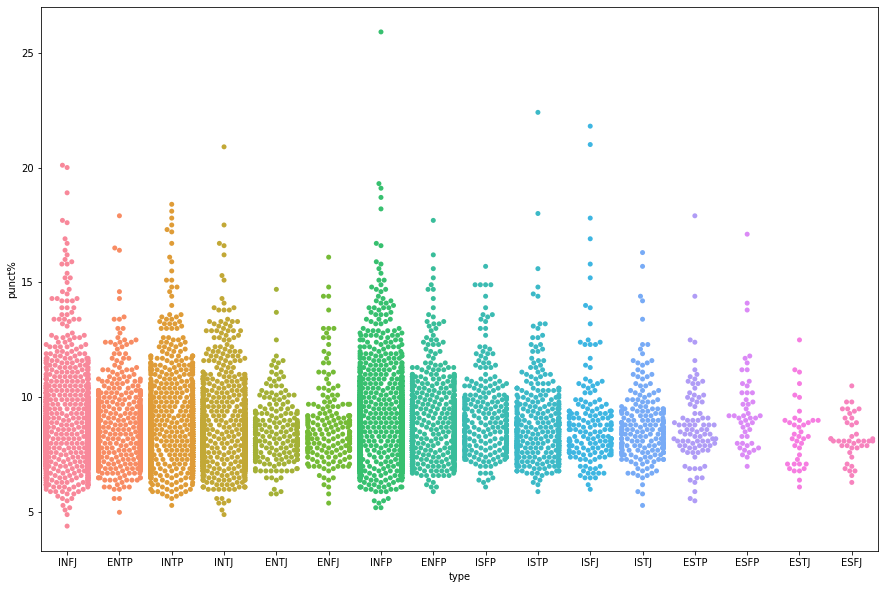

In [18]:
plt.figure(figsize=(15,10))
sn.swarmplot("type", "punct%", data=df)

/Users/maidang/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/maidang/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 88.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/maidang/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 84.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/maidang/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 87.0% of the points cannot be placed; you may want to decrease the size of the marker

<AxesSubplot:xlabel='type', ylabel='links%'>

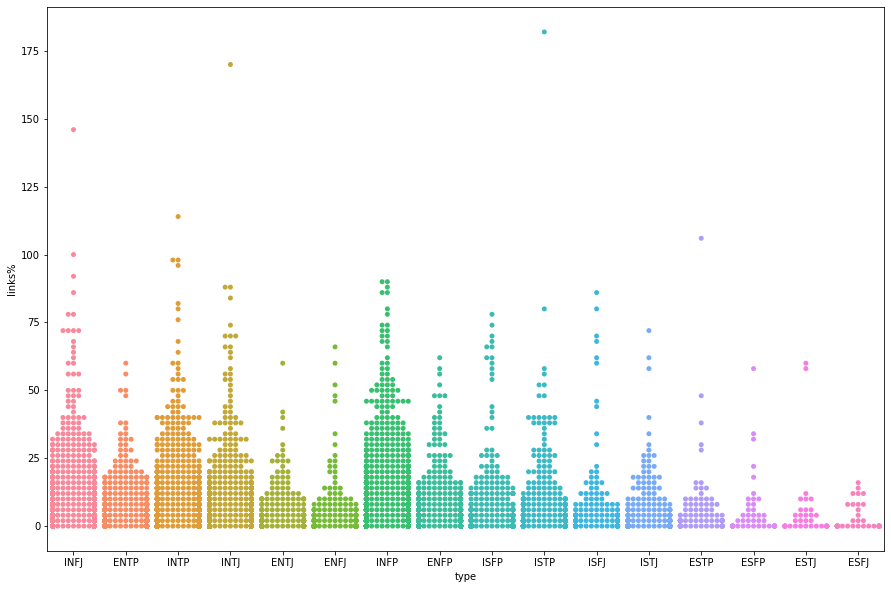

In [19]:
plt.figure(figsize=(15,10))
sn.swarmplot("type", "links%", data=df)

/Users/maidang/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 1080x720 with 0 Axes>

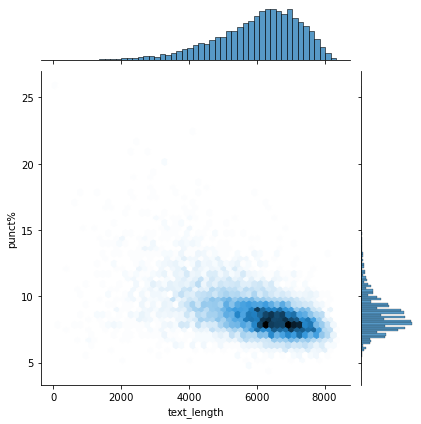

In [20]:
plt.figure(figsize=(15,10))
sn.jointplot("text_length", "punct%", data=df, kind="hex")

/Users/maidang/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/maidang/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/maidang/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretatio

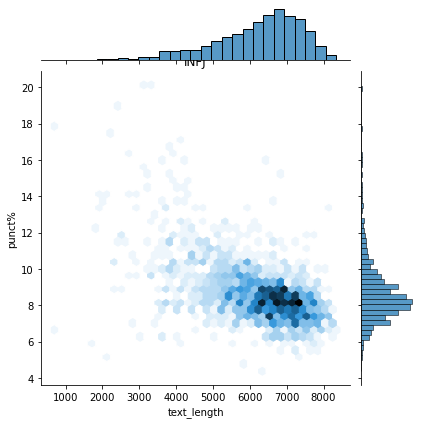

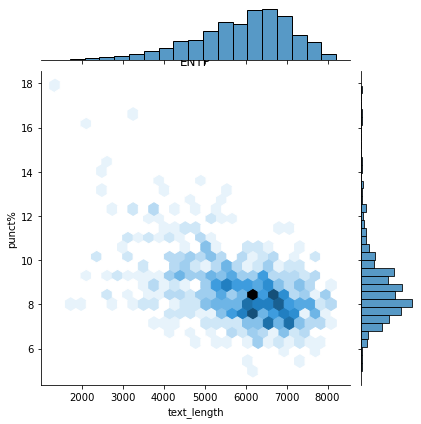

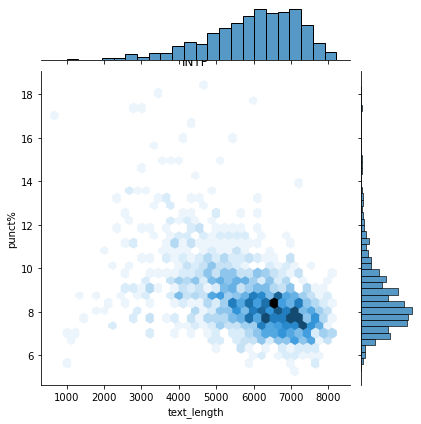

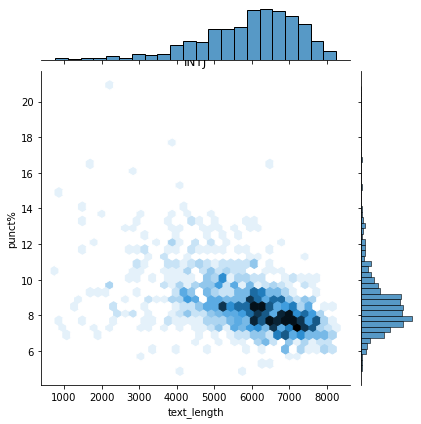

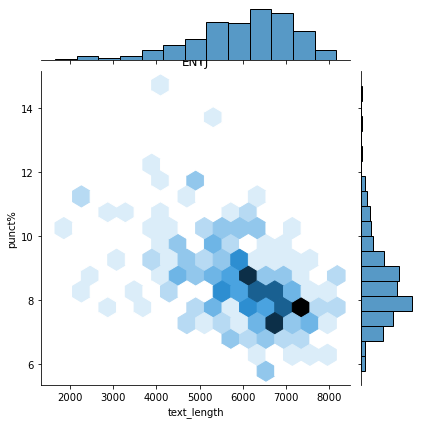

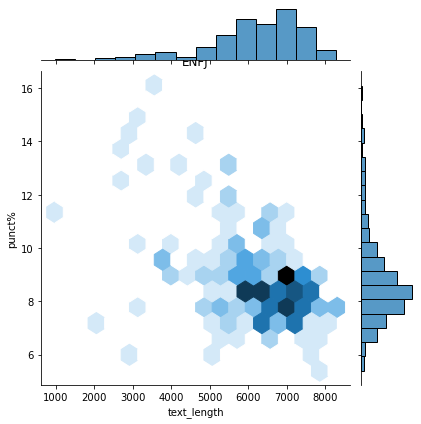

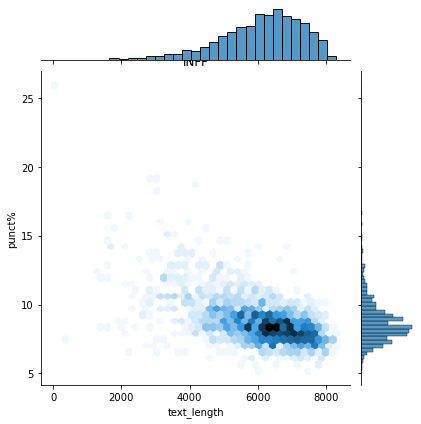

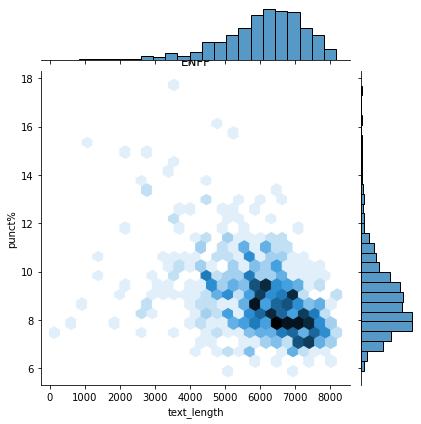

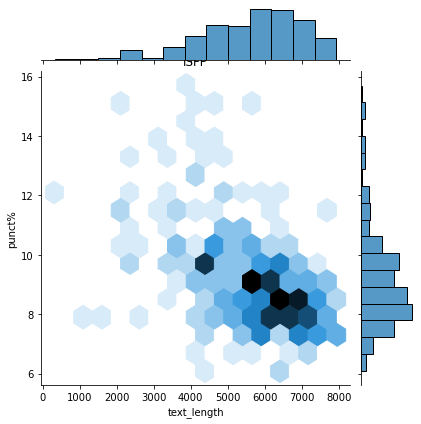

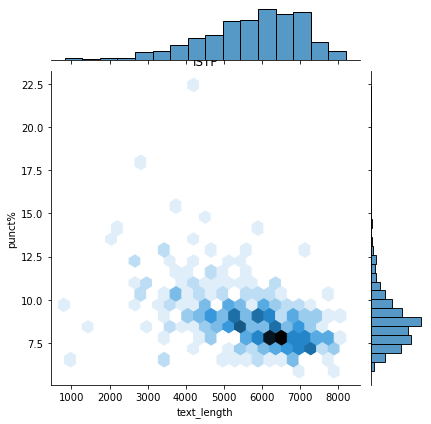

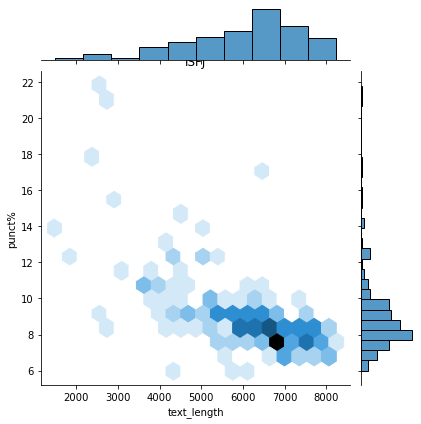

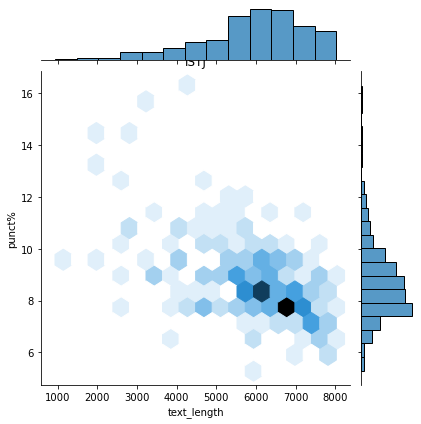

In [21]:
def plot_jointplot(mbti_type, axs, titles):
    df_3 = df[df['type'] == mbti_type]
    sn.jointplot("text_length", "punct%", data=df_3, kind="hex", ax = axs, title = titles)
    
i = df['type'].unique()
k = 0
for m in range(0,2):
    for n in range(0,6):
        df_3 = df[df['type'] == i[k]]
        sn.jointplot("text_length", "punct%", data=df_3, kind="hex")
        plt.title(i[k])
        k+=1

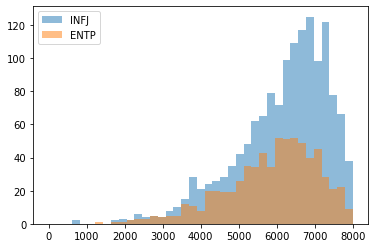

In [22]:

import numpy as np
#Checking if the text_length is worthwhile:
bins = np.linspace(0,8000,40)
plt.hist(df[df['type'] =="INFJ"]['text_length'], bins, alpha =0.5, label="INFJ")
plt.hist(df[df['type'] =="ENTP"]['text_length'], bins, alpha =0.5, label="ENTP")
plt.legend(loc = 'upper left')
plt.show()


The text length is a good feature as we can see the INFJ has more number of words than the ENTP 

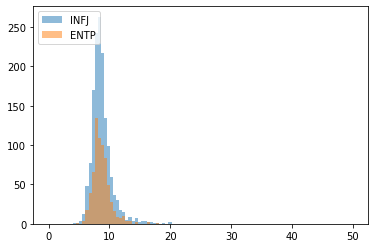

In [23]:
bins = np.linspace(0,50,100)
plt.hist(df[df['type'] =="INFJ"]['punct%'], bins, alpha =0.5, label="INFJ")
plt.hist(df[df['type'] =="ENTP"]['punct%'], bins, alpha =0.5, label="ENTP")
plt.legend(loc = 'upper left')
plt.show()

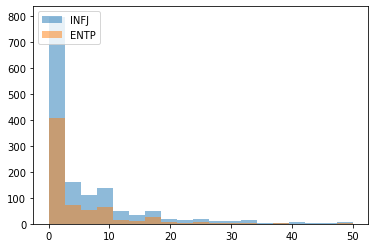

In [24]:
bins = np.linspace(0,50,20)
plt.hist(df[df['type'] =="INFJ"]['links%'], bins, alpha =0.5, label="INFJ")
plt.hist(df[df['type'] =="ENTP"]['links%'], bins, alpha =0.5, label="ENTP")
plt.legend(loc = 'upper left')
plt.show()

## Model Selection 

In [25]:
X_counts

<8675x312793 sparse matrix of type '<class 'numpy.int64'>'
	with 3621088 stored elements in Compressed Sparse Row format>

In [26]:
X_tfidf_feat = pd.concat([df['text_length'], df['punct%'],df['links%'], pd.DataFrame(X_tfidf.toarray())], axis=1)
X_count_feat = pd.concat([df['text_length'], df['punct%'],df['links%'], pd.DataFrame(X_counts.toarray())], axis=1)

In [27]:
X_count_feat.shape


(8675, 312796)

In [28]:
X_tfidf_feat.shape

(8675, 312796)

In [29]:
from sklearn.naive_bayes import MultinomialNB
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer


In [30]:
df['type'].value_counts()

INFP    1832
INFJ    1470
INTP    1304
INTJ    1091
ENTP     685
ENFP     675
ISTP     337
ISFP     271
ENTJ     231
ISTJ     205
ENFJ     190
ISFJ     166
ESTP      89
ESFP      48
ESFJ      42
ESTJ      39
Name: type, dtype: int64

In [31]:
counter = Counter(df["type"].tolist())

In [32]:
y= np.array(df['type'])
y

array(['INFJ', 'ENTP', 'INTP', ..., 'INTP', 'INFP', 'INFP'], dtype=object)

In [33]:
type_list = {i[0]:idx for idx, i in enumerate(counter.most_common(16))}
df2 = df[df["type"].map(lambda x: x in type_list)]
y = [type_list[i] for i in df2['type']. tolist()]
y = np.array(y)
y

array([1, 4, 2, ..., 2, 0, 0])

In [34]:
y.shape

(8675,)

In [35]:
post_list= df["posts"].tolist()
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(post_list)

In [36]:
X_train_counts.shape

(8675, 145412)

In [37]:
tfdif_transformer = TfidfTransformer()
X_train_tfdif = tfdif_transformer.fit_transform(X_train_counts)

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X_train_tfdif,y, test_size=0.3)
clf = MultinomialNB().fit(X_train, y_train)
y_predict = clf.predict(X_test)


In [39]:
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix(y_test, y_predict)

array([[549,   1,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0],
       [416,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0],
       [396,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0],
       [341,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0],
       [218,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0],
       [197,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0],
       [101,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0],
       [ 81,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0],
       [ 74,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0],
       [ 54,   1,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0],
       [ 61,   0,   0,   0,   

In [40]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.21      1.00      0.35       550
           1       0.00      0.00      0.00       416
           2       0.00      0.00      0.00       396
           3       0.00      0.00      0.00       341
           4       0.00      0.00      0.00       218
           5       0.00      0.00      0.00       197
           6       0.00      0.00      0.00       101
           7       0.00      0.00      0.00        81
           8       0.00      0.00      0.00        74
           9       0.00      0.00      0.00        55
          10       0.00      0.00      0.00        61
          11       0.00      0.00      0.00        48
          12       0.00      0.00      0.00        31
          13       0.00      0.00      0.00        13
          14       0.00      0.00      0.00        13
          15       0.00      0.00      0.00         8

    accuracy                           0.21      2603
   macro avg       0.01   

/Users/maidang/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/maidang/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/maidang/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [41]:
n_right = 0 
for i in range(len(y_predict)):
    if y_predict[i] == y_test[i]:
        n_right+=1
print("Accuracy: %.2f%%"%((n_right/float(len(y_test))*100)))

Accuracy: 21.09%


In [42]:
from sklearn.svm import SVC
clf = SVC(kernel='linear').fit(X_train, y_train)
y_predict = clf.predict(X_test)
confusion_matrix(y_test, y_predict)

array([[476,  16,  26,  12,   6,   6,   4,   0,   0,   1,   2,   1,   0,
          0,   0,   0],
       [ 92, 278,  18,  17,   1,   8,   1,   0,   0,   0,   1,   0,   0,
          0,   0,   0],
       [ 53,  19, 288,  18,  10,   4,   1,   1,   0,   1,   1,   0,   0,
          0,   0,   0],
       [ 48,  19,  46, 213,   4,   7,   1,   0,   1,   0,   1,   0,   0,
          0,   1,   0],
       [ 20,  21,  38,  10, 120,   8,   1,   0,   0,   0,   0,   0,   0,
          0,   0,   0],
       [ 55,  13,   8,   9,   6, 102,   2,   0,   1,   0,   0,   1,   0,
          0,   0,   0],
       [ 19,   5,  22,   8,   2,   1,  43,   0,   0,   0,   0,   1,   0,
          0,   0,   0],
       [ 43,   6,   8,   3,   3,   2,   3,  13,   0,   0,   0,   0,   0,
          0,   0,   0],
       [ 14,   6,  10,  17,   4,   1,   0,   1,  20,   0,   1,   0,   0,
          0,   0,   0],
       [  8,   3,  14,   9,   1,   0,   0,   0,   0,  19,   0,   0,   0,
          0,   1,   0],
       [ 21,  17,   4,   3,   

In [43]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.54      0.87      0.66       550
           1       0.66      0.67      0.66       416
           2       0.58      0.73      0.65       396
           3       0.65      0.62      0.64       341
           4       0.74      0.55      0.63       218
           5       0.70      0.52      0.60       197
           6       0.70      0.43      0.53       101
           7       0.87      0.16      0.27        81
           8       0.77      0.27      0.40        74
           9       0.83      0.35      0.49        55
          10       0.62      0.16      0.26        61
          11       0.82      0.29      0.43        48
          12       1.00      0.03      0.06        31
          13       0.00      0.00      0.00        13
          14       0.00      0.00      0.00        13
          15       0.00      0.00      0.00         8

    accuracy                           0.61      2603
   macro avg       0.59   

/Users/maidang/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/maidang/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/maidang/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [44]:
n_right = 0 
for i in range(len(y_predict)):
    if y_predict[i] == y_test[i]:
        n_right+=1
print("Accuracy: %.2f%%"%((n_right/float(len(y_test))*100)))

Accuracy: 61.35%


In [45]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression().fit(X_train, y_train)
print(f"Training score: {clf.score(X_train, y_train)}")
print(f"Test score: {clf.score(X_test, y_test)}")

Training score: 0.7404479578392622
Test score: 0.5920092201306185


/Users/maidang/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [46]:
y_predict = clf.predict(X_test)
confusion_matrix(y_test, y_predict)

array([[498,  12,  20,   8,   7,   4,   0,   0,   0,   0,   1,   0,   0,
          0,   0,   0],
       [ 87, 286,  22,  12,   1,   8,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0],
       [ 51,  21, 299,  15,   5,   3,   1,   1,   0,   0,   0,   0,   0,
          0,   0,   0],
       [ 48,  19,  45, 220,   1,   7,   1,   0,   0,   0,   0,   0,   0,
          0,   0,   0],
       [ 24,  22,  41,  15, 109,   6,   0,   1,   0,   0,   0,   0,   0,
          0,   0,   0],
       [ 59,  18,  10,  12,   6,  91,   1,   0,   0,   0,   0,   0,   0,
          0,   0,   0],
       [ 32,   6,  36,   8,   3,   0,  16,   0,   0,   0,   0,   0,   0,
          0,   0,   0],
       [ 48,   6,  12,   4,   2,   1,   3,   5,   0,   0,   0,   0,   0,
          0,   0,   0],
       [ 18,   7,  14,  18,   7,   4,   0,   0,   6,   0,   0,   0,   0,
          0,   0,   0],
       [ 16,   6,  17,  10,   1,   0,   0,   0,   0,   5,   0,   0,   0,
          0,   0,   0],
       [ 23,  20,   6,   4,   

In [47]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.53      0.91      0.67       550
           1       0.64      0.69      0.66       416
           2       0.56      0.76      0.64       396
           3       0.65      0.65      0.65       341
           4       0.74      0.50      0.60       218
           5       0.67      0.46      0.55       197
           6       0.67      0.16      0.26       101
           7       0.71      0.06      0.11        81
           8       0.75      0.08      0.15        74
           9       0.83      0.09      0.16        55
          10       0.67      0.03      0.06        61
          11       1.00      0.08      0.15        48
          12       0.00      0.00      0.00        31
          13       0.00      0.00      0.00        13
          14       0.00      0.00      0.00        13
          15       0.00      0.00      0.00         8

    accuracy                           0.59      2603
   macro avg       0.53   

/Users/maidang/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/maidang/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/maidang/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [48]:
n_right = 0 
for i in range(len(y_predict)):
    if y_predict[i] == y_test[i]:
        n_right+=1
print("Accuracy: %.2f%%"%((n_right/float(len(y_test))*100)))

Accuracy: 59.20%


In [49]:
from sklearn.ensemble import ExtraTreesClassifier
clf = ExtraTreesClassifier(random_state=0).fit(X_train, y_train)

In [50]:
y_predict = clf.predict(X_test)
confusion_matrix(y_test, y_predict)

array([[488,  48,  12,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0],
       [225, 167,  23,   0,   0,   1,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0],
       [192,  47, 152,   5,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0],
       [150,  74,  62,  54,   0,   1,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0],
       [113,  51,  40,  10,   3,   1,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0],
       [134,  39,  12,   1,   0,  11,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0],
       [ 70,  11,  15,   4,   1,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0],
       [ 66,   9,   6,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0],
       [ 39,  15,  14,   6,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0],
       [ 32,  14,   7,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0],
       [ 40,  19,   2,   0,   

In [51]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.30      0.89      0.45       550
           1       0.32      0.40      0.36       416
           2       0.43      0.38      0.41       396
           3       0.64      0.16      0.25       341
           4       0.75      0.01      0.03       218
           5       0.79      0.06      0.10       197
           6       0.00      0.00      0.00       101
           7       0.00      0.00      0.00        81
           8       0.00      0.00      0.00        74
           9       0.00      0.00      0.00        55
          10       0.00      0.00      0.00        61
          11       0.00      0.00      0.00        48
          12       0.00      0.00      0.00        31
          13       0.00      0.00      0.00        13
          14       0.00      0.00      0.00        13
          15       0.00      0.00      0.00         8

    accuracy                           0.34      2603
   macro avg       0.20   

/Users/maidang/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/maidang/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/maidang/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [52]:
n_right = 0 
for i in range(len(y_predict)):
    if y_predict[i] == y_test[i]:
        n_right+=1
print("Accuracy: %.2f%%"%((n_right/float(len(y_test))*100)))

Accuracy: 33.62%


In [53]:
!pip install xgboost
from xgboost import XGBClassifier

In [54]:
clf=XGBClassifier().fit(X_train, y_train)

print(f"Training score: {clf.score(X_train, y_train)}")
print(f"Test score: {clf.score(X_test, y_test)}")

Training score: 1.0
Test score: 0.6615443718786016


In [55]:
y_predict = clf.predict(X_test)
confusion_matrix(y_test, y_predict)

array([[450,  33,  23,  11,  11,  11,   3,   3,   2,   0,   1,   1,   0,
          1,   0,   0],
       [ 46, 300,  18,  13,   8,  13,   2,   4,   2,   3,   5,   0,   1,
          1,   0,   0],
       [ 38,  20, 287,  16,  16,   6,   6,   2,   1,   1,   0,   3,   0,
          0,   0,   0],
       [ 30,  20,  30, 224,   5,  13,   2,   4,   4,   3,   4,   2,   0,
          0,   0,   0],
       [ 13,  20,  18,  13, 139,   8,   0,   2,   1,   2,   0,   1,   0,
          0,   0,   1],
       [ 30,  11,  11,  12,  13, 111,   3,   2,   1,   2,   0,   0,   0,
          0,   0,   1],
       [ 13,   4,  10,   3,   4,   4,  62,   0,   0,   0,   0,   1,   0,
          0,   0,   0],
       [ 25,  12,   8,   1,   1,   1,   3,  28,   0,   0,   0,   2,   0,
          0,   0,   0],
       [ 11,   5,   8,   6,   7,   4,   0,   1,  28,   0,   3,   0,   1,
          0,   0,   0],
       [  1,   5,   9,   7,   2,   1,   0,   0,   0,  27,   0,   2,   0,
          0,   1,   0],
       [  8,   7,   5,   5,   

In [56]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.66      0.82      0.73       550
           1       0.66      0.72      0.69       416
           2       0.65      0.72      0.69       396
           3       0.70      0.66      0.68       341
           4       0.66      0.64      0.65       218
           5       0.62      0.56      0.59       197
           6       0.70      0.61      0.66       101
           7       0.60      0.35      0.44        81
           8       0.64      0.38      0.47        74
           9       0.69      0.49      0.57        55
          10       0.67      0.43      0.52        61
          11       0.65      0.54      0.59        48
          12       0.80      0.26      0.39        31
          13       0.33      0.08      0.12        13
          14       0.80      0.31      0.44        13
          15       0.33      0.12      0.18         8

    accuracy                           0.66      2603
   macro avg       0.64   

In [57]:
n_right = 0 
for i in range(len(y_predict)):
    if y_predict[i] == y_test[i]:
        n_right+=1
print("Accuracy: %.2f%%"%((n_right/float(len(y_test))*100)))

Accuracy: 66.15%
